# Plant Disease Prediction

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


2024-11-15 20:30:12.192644: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-15 20:30:12.192671: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-15 20:30:12.192683: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-15 20:30:12.192766: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-15 20:30:12.192811: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

In [7]:
model = tf.keras.models.Sequential()

### Building Convolution Layer

In [8]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(tf.keras.layers.Dropout(0.25))

In [14]:
model.add(tf.keras.layers.Flatten())

In [15]:
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
model.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [17]:
#Output Layer
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [18]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2024-11-15 20:30:37.830420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2197/2197 [==============================] - ETA: 0s - loss: 1.3357 - accuracy: 0.6060

2024-11-15 20:38:10.389899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2197/2197 [==============================] - 486s 221ms/step - loss: 1.3357 - accuracy: 0.6060 - val_loss: 0.8139 - val_accuracy: 0.7602
Epoch 2/10
2197/2197 [==============================] - 483s 220ms/step - loss: 0.4979 - accuracy: 0.8462 - val_loss: 0.4390 - val_accuracy: 0.8626
Epoch 3/10
2197/2197 [==============================] - 533s 243ms/step - loss: 0.3330 - accuracy: 0.8950 - val_loss: 0.3587 - val_accuracy: 0.8897
Epoch 4/10
2197/2197 [==============================] - 508s 231ms/step - loss: 0.2403 - accuracy: 0.9254 - val_loss: 0.2520 - val_accuracy: 0.9286
Epoch 5/10
2197/2197 [==============================] - 504s 230ms/step - loss: 0.1998 - accuracy: 0.9381 - val_loss: 0.3357 - val_accuracy: 0.9133
Epoch 6/10
2197/2197 [==============================] - 470s 214ms/step - loss: 0.1612 - accuracy: 0.9513 - val_loss: 0.2190 - val_accuracy: 0.9408
Epoch 7/10
2197/2197 [==============================] - 493s 224ms/step - loss: 0.1380 - accuracy: 0.9589 - val_loss: 0.184

## Evaluating Model

In [21]:

train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 142s 64ms/step - loss: 0.0629 - accuracy: 0.9832
Training accuracy: 0.983156681060791


In [22]:

val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 35s 63ms/step - loss: 0.2097 - accuracy: 0.9540
Validation accuracy: 0.9540177583694458


### Saving Model

In [37]:
model.save('trained_model.keras')

In [24]:
training_history.history #Return Dictionary of history

{'loss': [1.3357309103012085,
  0.49786874651908875,
  0.33295321464538574,
  0.24029916524887085,
  0.19983579218387604,
  0.16118021309375763,
  0.13795527815818787,
  0.12128118425607681,
  0.10296094417572021,
  0.09914594143629074],
 'accuracy': [0.6059890389442444,
  0.8462337255477905,
  0.8950138688087463,
  0.9253574013710022,
  0.9381464123725891,
  0.9512625336647034,
  0.9588733315467834,
  0.9646347761154175,
  0.9704815149307251,
  0.9716907143592834],
 'val_loss': [0.8139306306838989,
  0.4390156865119934,
  0.3586510121822357,
  0.25196343660354614,
  0.33574774861335754,
  0.21896637976169586,
  0.18473590910434723,
  0.23429161310195923,
  0.2975066304206848,
  0.20974719524383545],
 'val_accuracy': [0.7602435946464539,
  0.8626223802566528,
  0.8897109031677246,
  0.928579568862915,
  0.9133280515670776,
  0.9408149123191833,
  0.9478147029876709,
  0.941725492477417,
  0.9363760352134705,
  0.9540177583694458]}

In [25]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [26]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

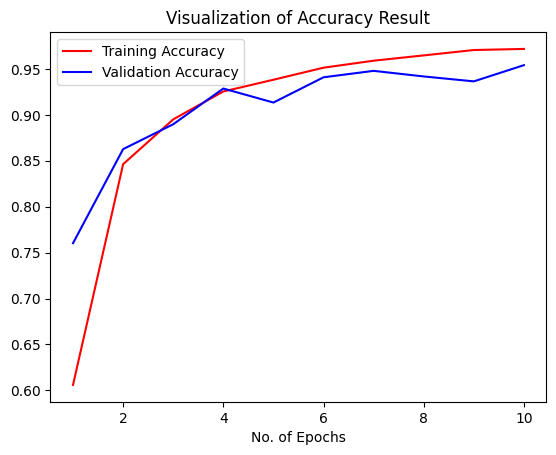

In [27]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [28]:
class_name = validation_set.class_names

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [30]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

   13/17572 [..............................] - ETA: 1:13   

2024-11-15 21:54:43.304141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17572/17572 [==============================] - 113s 6ms/step


In [31]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [33]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [35]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.99      0.97       440
                                   Apple___healthy       0.97      0.89      0.93       502
                               Blueberry___healthy       0.93      0.97      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.81      0.88       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.87      0.98      0.

### Confusion Matrix Visualization

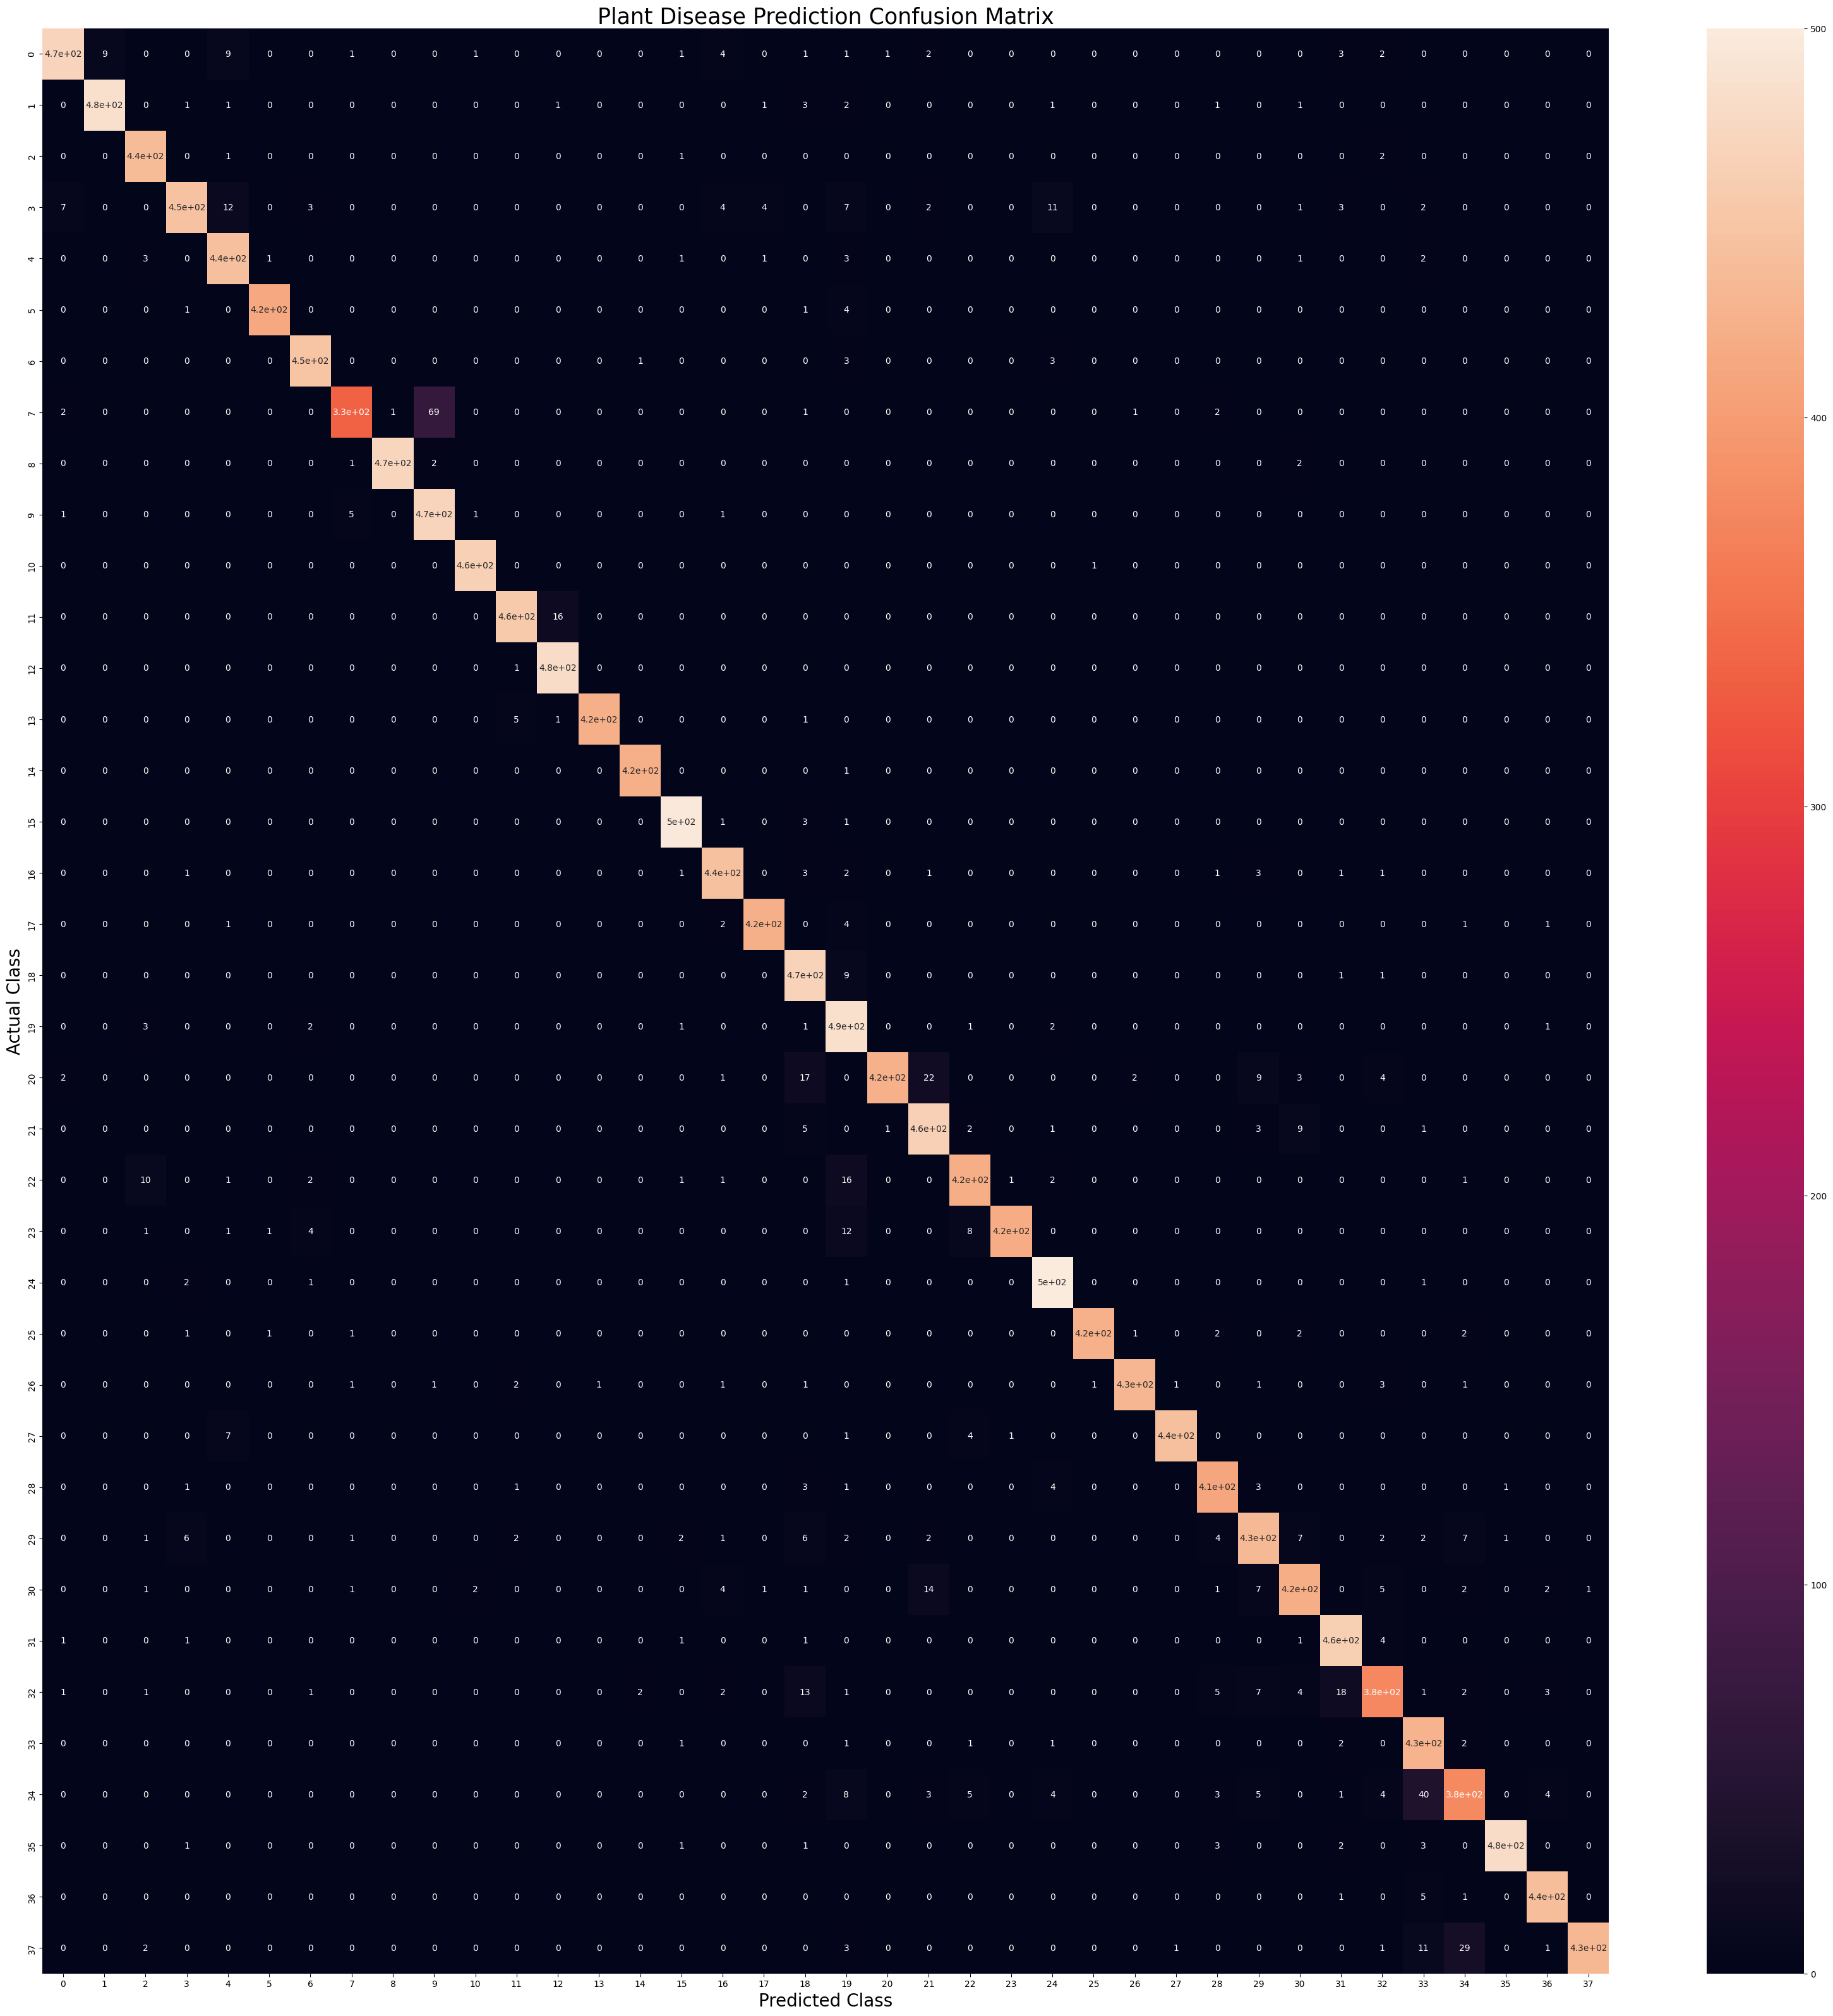

In [36]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()